# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *10장 다양한 머신러닝 기법 - SVM, 결정 트리, 차원 축소*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 10.4 서포트 벡터 머신을 파이프라인을 사용하여 구현해 보기

In [ ]:
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

In [ ]:
import numpy as np

d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d, j))   # 데이터 집합
y = [0]*len(d) + [1]*len(j)  # 레이블 집합
print('dogs :', X)
print('labels :', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([  # 표준 스케일러, 선형 SVM 분류기를 파이프라인에 넘겨줌
               ('scaler', StandardScaler()),
               ('linearSVC', LinearSVC(C=1, loss='hinge', dual=True))
])
svm.fit(X, y)     # 이 svm 파이프라인에 X, y 값을 넣어 학습시킴

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, dual=True, loss='hinge'))])

In [ ]:
dog_classes = {0:'Dachshund', 1:'Jindo dog'}
data1, data2 = [59, 35], [53, 54]
y_pred = svm.predict([data1])
print('데이터 :', data1, ', 판정 결과:', dog_classes[y_pred[0]])
y_pred = svm.predict([data2])
print('데이터 :', data2, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 : [59, 35] , 판정 결과: Dachshund
데이터 : [53, 54] , 판정 결과: Jindo dog


### 10.5 많은 데이터에 대하여 서포트 벡터 머신으로 분류하기

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


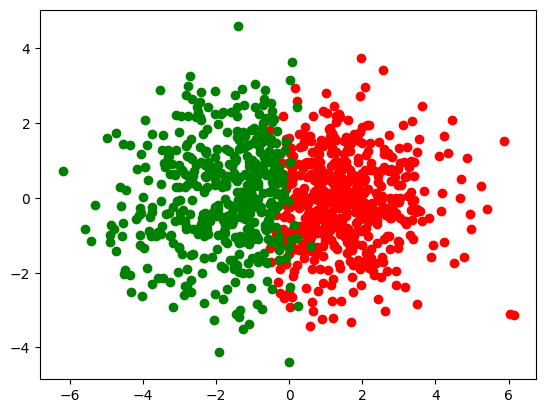

In [ ]:
df_positive = df[df['y']==1]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]     # y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']].to_numpy()           # x1, x2를 입력 벡터로 한다
y = df['y']                               # y열의 값이 레이블
svm = Pipeline([  # 표준 스케일러, 선형 SVM 분류기를 파이프라인에 넘겨줌
                ('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge', dual='auto'))
])
svm.fit(X, y)     # 이 svm 파이프라인에 X, y 값을 넣어 학습시킴

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, dual='auto', loss='hinge'))])

In [ ]:
svm.predict([[0.12, 0.56], [-4, 40], [0, 40], [5,20]])

array([1, 0, 0, 1])

In [ ]:
svm.named_steps['linearSVC'].coef_

array([[ 5.79479653, -0.14501141]])

### 10.6 커널 함수를 이용한 서포트 벡터 머신

Text(0.5, 1.0, 'XOR')

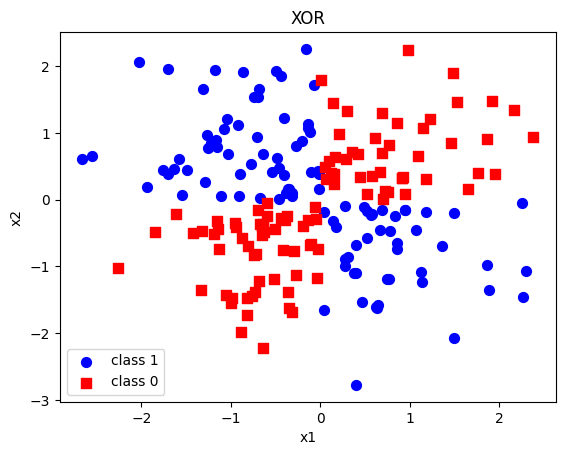

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR")

### 10.7 여러 서포트 벡터 머신 분류 결과를 시각화하자

In [ ]:
import matplotlib as mpl

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='class 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

linsvc = SVC(kernel="linear").fit(X_xor, y_xor)
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)

print('선형 SVM 정확도: ', accuracy_score(y_xor, linsvc.predict(X_xor)))
print('polynomial SVM 정확도: ', accuracy_score(y_xor, polysvc.predict(X_xor)))
print('rbf SVM 정확도: ', accuracy_score(y_xor, rbfsvc.predict(X_xor)))

선형 SVM 정확도:  0.67
polynomial SVM 정확도:  0.96
rbf SVM 정확도:  0.985


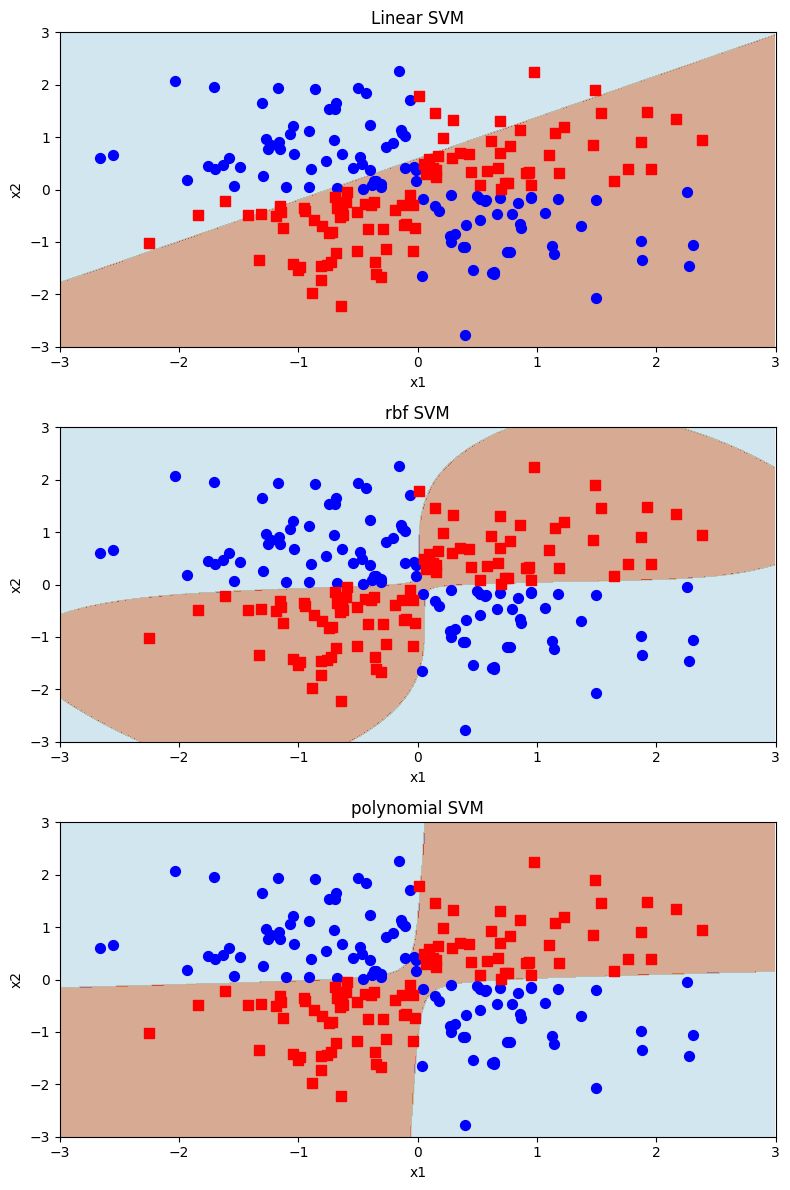

In [ ]:
plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_xor(X_xor, y_xor, linsvc, "Linear SVM")
plt.subplot(312)
plot_xor(X_xor, y_xor, rbfsvc, "rbf SVM")
plt.subplot(313)
plot_xor(X_xor, y_xor, polysvc, "polynomial SVM")
plt.tight_layout()

In [ ]:
print('rbf SVM 이용한 샘플별 예측 결과: ', rbfsvc.predict(X_xor))
print('rbf SVM 이용한 샘플별 불확실성: ', rbfsvc.decision_function(X_xor))

rbf SVM 이용한 샘플별 예측 결과:  [0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0]
rbf SVM 이용한 샘플별 불확실성:  [-1.00045062 -1.0002846   2.07231953  0.7270196   0.25797341 -0.3708097
 -0.33316888 -0.73913801  1.00014543  0.9222942   1.11983648  2.23129482
  1.31038587 -0.02831051 -2.15720122 -0.31348515 -1.59042505  0.36125468
 -2.61376667 -0.62988728 -2.45212535  1.4515422  -1.07846385  2.58859023
 -0.26578046  1.61510339 -1.91259703  0.08506393 -0.10981988 -0.99961931
 -1.01431053 -1.93639073  0.25706242  1.80345725  0.4628993  -0.35642853
  2.68356876  1.09698413 -1.75094947  0.13628974  2.71970409  1.44832698
 -1.56042069  0.91653812  2.7651725 

### 10.8 결정 트리와 분류

### 10.9 엔트로피를 계산해보자

### 10.10 엔트로피 곡면과 정보 이득

### 10.11 불순도를 이용한 의사결정 트리 - CART 알고리즘

### 10.12 결정트리 구현해 보기


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
test_sample=[[3, 2, 1, 0.2],[4.9, 2.2, 3.8, 1.1],[5.3, 2.5, 4.6, 1.9]]
dec_tree.predict(test_sample)

array([0, 1, 2])

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
  dec_tree,
  out_file=("./dec_tree_for_iris.dot"),
  feature_names=iris.feature_names,
  class_names = ['setosa', 'versicolor', 'virginica'] # 2쇄에 추가
)

!ls

dec_tree_for_iris.dot  sample_data


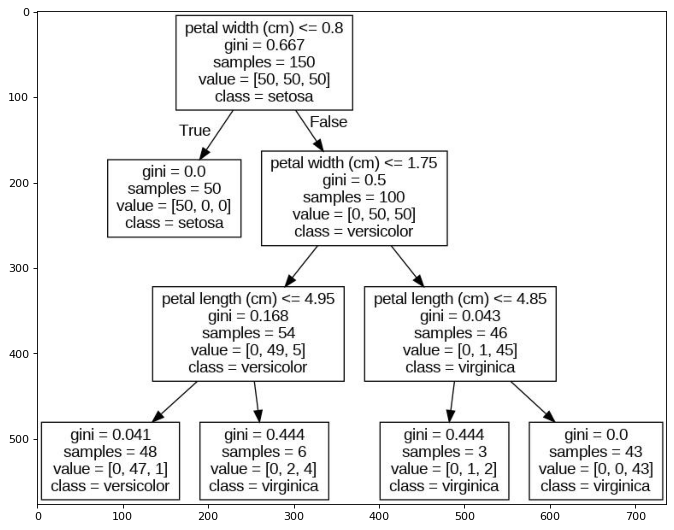

In [ ]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
           facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

### 10.13 앙상블 기법

### 10.14 앙상블 모델의 성능 비교

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
# iris 데이터셋으로부터 2개의 특징만을 추출하자
X, y = iris.data[:, [0, 2]], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,\
                                                    random_state=0)

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'결정트리를 이용한 학습 데이터 분류 정확도 : {tree_train:.3%}')
print(f'결정트리를 이용한 테스트 데이터 분류 정확도 : {tree_test:.3%}')

결정트리를 이용한 학습 데이터 분류 정확도 : 97.143%
결정트리를 이용한 테스트 데이터 분류 정확도 : 91.111%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10,
                                max_features = 2,
                                max_depth=None,
                                random_state=1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

forest_train = accuracy_score(y_train, y_train_pred)
forest_test = accuracy_score(y_test, y_test_pred)
print(f'랜덤포레스트를 이용한 학습 데이터 분류 정확도 : {forest_train:.3%}')
print(f'랜덤포레스트를 이용한 테스트 데이터 분류 정확도 : {forest_test:.3%}')

랜덤포레스트를 이용한 학습 데이터 분류 정확도 : 99.048%
랜덤포레스트를 이용한 테스트 데이터 분류 정확도 : 95.556%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=5,learning_rate=0.5,\
                                  max_depth = 3, random_state=1)
boost.fit(X_train, y_train)
y_train_pred = boost.predict(X_train)
y_test_pred = boost.predict(X_test)
boost_train = accuracy_score(y_train, y_train_pred)
boost_test = accuracy_score(y_test, y_test_pred)
print(f'그래디언트부스팅을 이용한 학습 데이터 분류 정확도 : {boost_train:.3%}')
print(f'그래디언트부스팅을 이용한 테스트 데이터 분류 정확도 : {boost_test:.3%}')

그래디언트부스팅을 이용한 학습 데이터 분류 정확도 : 99.048%
그래디언트부스팅을 이용한 테스트 데이터 분류 정확도 : 93.333%


### 10.15 차원의 저주

### 10.16 차원 축소

### 10.17 3차원 공간의 데이터에서 주성분 찾기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성하기
n_data = 1000
X = []
for _ in range(n_data) :
    r_coeff = np.random.randn(2,)
    data = 2.0* r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)

X = np.array(X)

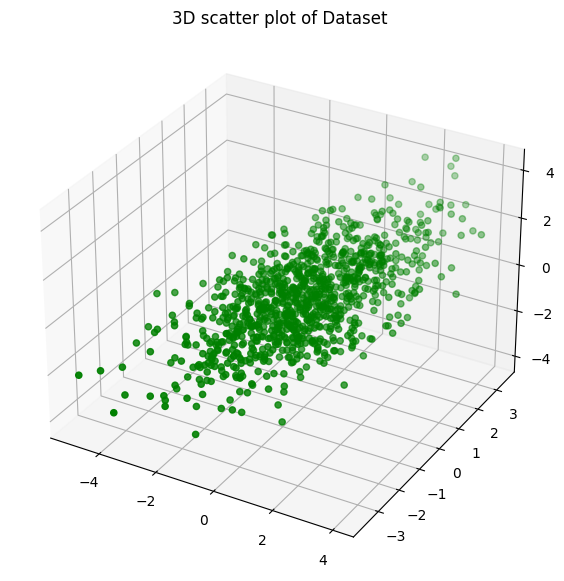

In [ ]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

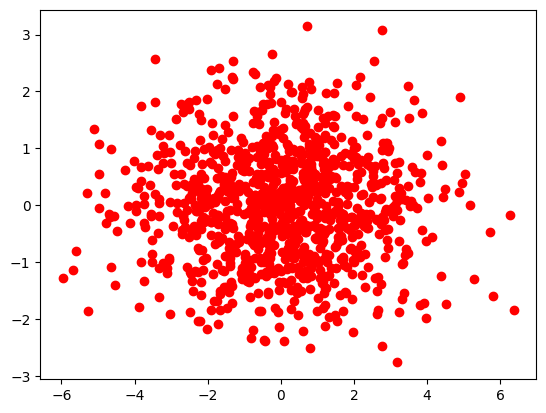

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

### 10.18 4차원 공간에 존재하는 붓꽃 데이터를 2차원에서 분류해 보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],\
                  columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from sklearn.preprocessing import StandardScaler
features = iris['feature_names']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result  = pca.fit_transform(x)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
principalDf, df['target']

(          PC1       PC2
 0   -2.264703  0.480027
 1   -2.080961 -0.674134
 2   -2.364229 -0.341908
 3   -2.299384 -0.597395
 4   -2.389842  0.646835
 ..        ...       ...
 145  1.870503  0.386966
 146  1.564580 -0.896687
 147  1.521170  0.269069
 148  1.372788  1.011254
 149  0.960656 -0.024332
 
 [150 rows x 2 columns],
 0      0.0
 1      0.0
 2      0.0
 3      0.0
 4      0.0
       ... 
 145    2.0
 146    2.0
 147    2.0
 148    2.0
 149    2.0
 Name: target, Length: 150, dtype: float64)

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,PC1,PC2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


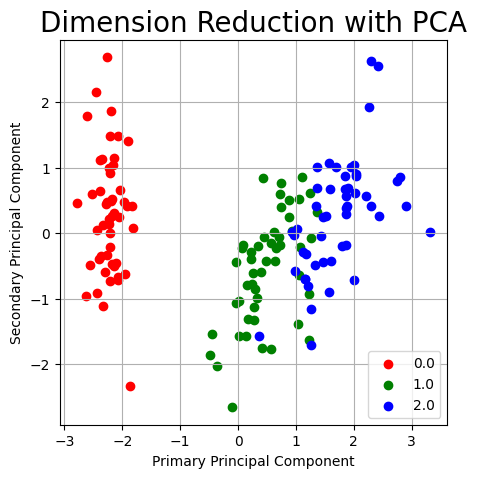

In [ ]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()